<a href="https://colab.research.google.com/github/jimioke/groupstackbar/blob/master/groupstackbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Get three lists 
['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']  sorted_order_for_stacking_V
['E', 'I', 'R', 'S']  sorted_order_for_stacking_B
['Week 1', 'Week 2', 'Week 3']  sorted_order_for_stacking_G


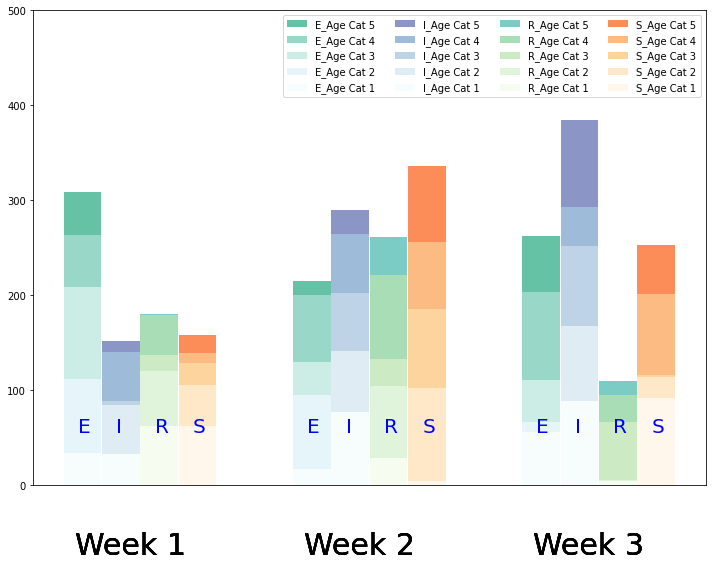

In [61]:
# S/E/I/R : 4 bars in each group
# each group is one week; 3 weeks
# age cat 1 to 5; 5 categories vertically in each bar

# csv format input 
# each row has three keys which together identify the row uniquely (age; week; SEIR)
import random
import csv



# some hardcoded color maps 
# This product includes color
# specifications and designs developed by Cynthia Brewer
# (http://colorbrewer.org/
sequential_colors = [['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b'],
                     ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b'],
                     ['#f7fcf0','#e0f3db','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081'],
                     ['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000'],
                     ["#ffffe5","#fff7bc","#fee391","#fec44f","#fe9929","#ec7014","#cc4c02","#993404","#662506"],
                      ["#fcfbfd","#efedf5","#dadaeb","#bcbddc","#9e9ac8","#807dba","#6a51a3","#54278f","#3f007d"],
                     ["#f7fbff","#deebf7","#c6dbef","#9ecae1","#6baed6","#4292c6","#2171b5","#08519c","#08306b"],
                     ["#f7fcf5","#e5f5e0","#c7e9c0","#a1d99b","#74c476","#41ab5d","#238b45","#006d2c","#00441b"],
                      ["#fff5eb","#fee6ce","#fdd0a2","#fdae6b","#fd8d3c","#f16913","#d94801","#a63603","#7f2704"],
                     ["#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"],
                     ["#ffffff","#f0f0f0","#d9d9d9","#bdbdbd","#969696","#737373","#525252","#252525","#000000"],
                     ["#7f3b08","#b35806","#e08214","#fdb863","#fee0b6","#f7f7f7","#d8daeb","#b2abd2","#8073ac","#542788","#2d004b"],
                     ["#67001f","#b2182b","#d6604d","#f4a582","#fddbc7","#ffffff","#e0e0e0","#bababa","#878787","#4d4d4d","#1a1a1a"],
                      ["#a50026","#d73027","#f46d43","#fdae61","#fee090","#ffffbf","#e0f3f8","#abd9e9","#74add1","#4575b4","#313695"],
                     ["#9e0142","#d53e4f","#f46d43","#fdae61","#fee08b","#ffffbf","#e6f598","#abdda4","#66c2a5","#3288bd","#5e4fa2"],
                      ["#a50026","#d73027","#f46d43","#fdae61","#fee08b","#ffffbf","#d9ef8b","#a6d96a","#66bd63","#1a9850","#006837"],
                     ["#7fc97f","#beaed4","#fdc086","#ffff99","#386cb0","#f0027f","#bf5b17","#666666"]

                     ]



def generate_dummy_data():
    with open('dummy_data.csv','w') as f:
        csvwriter = csv.writer(f)
        csvwriter.writerow(['Week','State_SEIR','Age_Cat','Value'])
        for i in ['Week 1', 'Week 2', 'Week 3']: # 3 weeks
            for j in ['S','E','I','R']:
                for k in ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']:
                    csvwriter.writerow([i,j,k, int(random.random()*100)])






### To-DO handle missing data: DONE, tested in the presence of missing data, 
###                                         we get or missing minor bar-lets

import matplotlib.pyplot as plt
import csv
import random
import sys
import os
from matplotlib import cm
# from colorspacious import cspace_converter
# from collections import OrderedDict

# cmaps = OrderedDict()




"""
Arguments: 

N:
  Number of colors in the map

type: 
  Types of colormap. 
  Currently two values are being accepted. 
  (1)'sequential' case-insensitive; 'S' or 's' can also be passed
  (2)'qualitative' case-insensitive; 'Q' or 'q' can also be passed


Returns:
  a list of colors with N levels; seq/qual based on type
"""
def getColorMaps(N=10, type='sequential'):
    N += 1 # handling the boundary case- we will fix this later. Since we run the loops till N-1 

    if type in ['sequential' ,'S' ,'s' , 'Sequential']:
        # generating a random starting point
        startPoint = (random.random(), random.random(), random.random())

        # choose a random axis 
        r = int(random.random() // 0.3333)
        color_list = []
        zeros = [0,0,0]

        zeros[0] = startPoint[0]
        zeros[1] = startPoint[1]
        zeros[2] = startPoint[2]
        zeros[r] = 0 #startPoint[r]

        for i in range(N-1):
            zeros[r] += ((1)/N)
            color_list.append(tuple(zeros))
        return color_list
    
    elif type in ['qualitative' ,'Q' ,'q' , 'Qualitative']:
        # generating a random starting point
        color_list = [] 
        for i in range(N-1):
            color_list.append(tuple([random.random(), random.random(), random.random()]))
        return color_list
    
    else:
        print ("Invalid argument for colormap passed! \n Exiting script")
        sys.exit()

    

"""
Arguments: 
filename: 
  a csv filename with 4 headers, H1, H2, H3 and H4. Each one of H1/H2/H3/H4 are strings.
  the first three headers(H1/H2/H3) should identify a row uniquely 
  the fourth header H4 contains the value (H4 must be integer or floating; cannot be a string)
  .csv files without headers will result in the first row being read as headers. 

duplicates:
  a binary argument (True/False) to specify if the filename contains 
  duplicate entries (i.e.) two rows with same <H1/H2/H3> identifier. If duplicates is True, 
  aggregation is performed before proceeding, both the duplicates are binned together to increase the target value 

BGV:a python list of three headers in order for stacking (Bars, Groups and Vertical Stacking)
  for example, if BGV=[H2, H1, H3], the group stack plot will be such that:
    maximum number of bars = number of unique values under column H2
    maximum number of bars grouped together horizontally(side-by-side) = number of 
                                                unique values under column H1
    maximum number of vertical stacks in any bar = number of unique values under column H2

"""
def plot_grouped_stacks(filename, BGV, fig_size=(10, 8), 
                        intra_group_spacing =0.1,
                        inter_group_spacing = 10, 
                        y_loc_for_group_name=-10,
                        y_loc_for_state_name=10,
                        fontcolor_states='blue',
                        fontcolor_groups='black',
                        fontsize_states=20,
                        fontsize_groups=30,
                        x_trim_state_label=0.6,
                        x_trim_group_label=1,
                        extra_space_on_top=20 
                        ):
    

    figure_ = plt.figure(figsize=fig_size)
    size = figure_.get_size_inches()
    figure_.add_subplot(1,1,1)

    # sanity check for inputs; some trivial exception handlings 
    if intra_group_spacing >= 100: 
        print ("Percentage for than 100 for variables intra_group_spacing, Aborting! ")
        return 
    else:
        intra_group_spacing = intra_group_spacing*size[0]/100  # converting percentanges to inches

    if inter_group_spacing >= 100: 
        print ("Percentage for than 100 for variables inter_group_spacing, Aborting! ")        
        return 
    else:
        inter_group_spacing = inter_group_spacing*size[0]/100  # converting percentanges to inches

    
    if y_loc_for_group_name >= 100: 
        print ("Percentage for than 100 for variables inter_group_spacing, Aborting! ")        
        return 
    else:
        # the multiplier 90 is set empirically to roughly align the percentage value 
        # <this is a quick fix solution, which needs to be improved later>
        y_loc_for_group_name = 90*y_loc_for_group_name*size[1]/100  # converting percentanges to inches


    if y_loc_for_state_name >= 100: 
        print ("Percentage for than 100 for variables inter_group_spacing, Aborting! ")        
        return 
    else:
        y_loc_for_state_name = 70*y_loc_for_state_name*size[1]/100  # converting percentanges to inches

    if x_trim_state_label >= 100: 
        print ("Percentage for than 100 for variables inter_group_spacing, Aborting! ")        
        return 
    else:
        x_trim_state_label = x_trim_state_label*size[0]/100  # converting percentanges to inches

    if x_trim_group_label >= 100: 
        print ("Percentage for than 100 for variables inter_group_spacing, Aborting! ")        
        return 
    else:
        x_trim_group_label = x_trim_group_label*size[0]/100  # converting percentanges to inches




    fileread_list = []

   
    with open(filename) as f:
        for row in f:
            r = row.strip().split(',')    
            if len(r) != 4:
                print ('4 items not found @ line ', c, ' of ', filename)
                return
            else:
                fileread_list.append(r)

        
    # inputs: 
    bar_variable = BGV[0]
    group_variable = BGV[1]
    vertical_stacking_variable = BGV[2]

    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == vertical_stacking_variable:
            header_num_Of_vertical_stacking = i
            break
    
    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[header_num_Of_vertical_stacking])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_V = list(sorted_order_for_stacking)
    #####################

    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == bar_variable:
            header_num_Of_bar_Variable = i
            break

    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[header_num_Of_bar_Variable])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_B = list(sorted_order_for_stacking)
    ######################

    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == group_variable:
            header_num_Of_bar_Variable = i
            break

    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[header_num_Of_bar_Variable])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_G = list(sorted_order_for_stacking)
    #########################   

    print (" Get three lists ")
    print (sorted_order_for_stacking_V, " sorted_order_for_stacking_V")
    print (sorted_order_for_stacking_B, " sorted_order_for_stacking_B")
    print (sorted_order_for_stacking_G, " sorted_order_for_stacking_G")
    



    # +1 because we need one space before and after as well
    each_group_width = (size[0] - (len(sorted_order_for_stacking_G) + 1) *
                        inter_group_spacing)/len(sorted_order_for_stacking_G)
    
    # -1 because we need n-1 spaces between bars if there are n bars in each group
    each_bar_width = (each_group_width - (len(sorted_order_for_stacking_B) - 1) *
                      intra_group_spacing)/len(sorted_order_for_stacking_B)

    
    # colormaps 
    number_of_color_maps_needed = len(sorted_order_for_stacking_B)
    number_of_levels_in_each_map = len(sorted_order_for_stacking_V)
    c_map_vertical = {}
    
    for i in range(number_of_color_maps_needed):
        try:
            c_map_vertical[sorted_order_for_stacking_B[i]] = sequential_colors[i]
        except:
            print ("Something went wrong with hardcoded colors!\n reverting to custom colors (linear in RGB) ") 
            c_map_vertical[sorted_order_for_stacking_B[i]] = getColorMaps(N = number_of_levels_in_each_map, type = 'S')

    ## 

    state_num = -1
    max_bar_height = 0
    for state in sorted_order_for_stacking_B:
        state_num += 1
        week_num = -1
        for week in ['Week 1', 'Week 2','Week 3']:
            week_num += 1

            a = [0] * len(sorted_order_for_stacking_V)
            for i in range(len(sorted_order_for_stacking_V)):

                for line_num in range(1,len(fileread_list)):  # skipping the first line
                    listed = fileread_list[line_num]

                    if listed[1] == state and listed[0] == week and listed[2] == sorted_order_for_stacking_V[i]:
                        a[i] = (float(listed[3]))

            
            # get cumulative values
            cum_val = [a[0]]
            for j in range(1,len(a)):
                cum_val.append( cum_val[j-1] + a[j] )
            max_bar_height = max([max_bar_height, max(cum_val)])        
    

            plt.text(x=  (week_num)*(each_group_width+inter_group_spacing) - x_trim_group_label
            , y=y_loc_for_group_name, s=sorted_order_for_stacking_G[week_num], fontsize=fontsize_groups, color=fontcolor_groups)

            
            
            # state labels need to be printed just once for each week, hence putting them outside the loop
            plt.text(x=  week_num*(each_group_width+inter_group_spacing) + (state_num)*(each_bar_width+intra_group_spacing) - x_trim_state_label
             , y=y_loc_for_state_name, s=sorted_order_for_stacking_B[state_num], fontsize=fontsize_states, color = fontcolor_states)


            if week_num == 1:
                # label only in the first week

                for i in range(len(sorted_order_for_stacking_V)-1,-1,-1): 
                    # trick to make them all visible: Plot in descending order of their height!! :)
                    plt.bar(  week_num*(each_group_width+inter_group_spacing) +
                            state_num*(each_bar_width+intra_group_spacing), 
                            height=cum_val[i] ,
                            width=each_bar_width, 
                            color=c_map_vertical[state][i], 
                            label= state + "_" + sorted_order_for_stacking_V[i] )
            else:
                    # no label after the first week, (as it is just repetition)
                    for i in range(len(sorted_order_for_stacking_V)-1,-1,-1): 
                        plt.bar(  week_num*(each_group_width+inter_group_spacing) +
                            state_num*(each_bar_width+intra_group_spacing), 
                            height=cum_val[i] ,
                            width=each_bar_width, 
                            color=c_map_vertical[state][i])
                        
    plt.ylim(0,max_bar_height*(1+extra_space_on_top/100))
    plt.tight_layout()
    plt.xticks([], [])
    plt.legend(ncol=len(sorted_order_for_stacking_B))
    plt.savefig("test.png", dpi=200)
    return figure_



generate_dummy_data()
f = plot_grouped_stacks('dummy_data.csv', BGV=['State_SEIR','Week','Age_Cat'], extra_space_on_top = 30)


plt.tight_layout()

plt.savefig("generate_image.png",dpi=300)


